
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      2

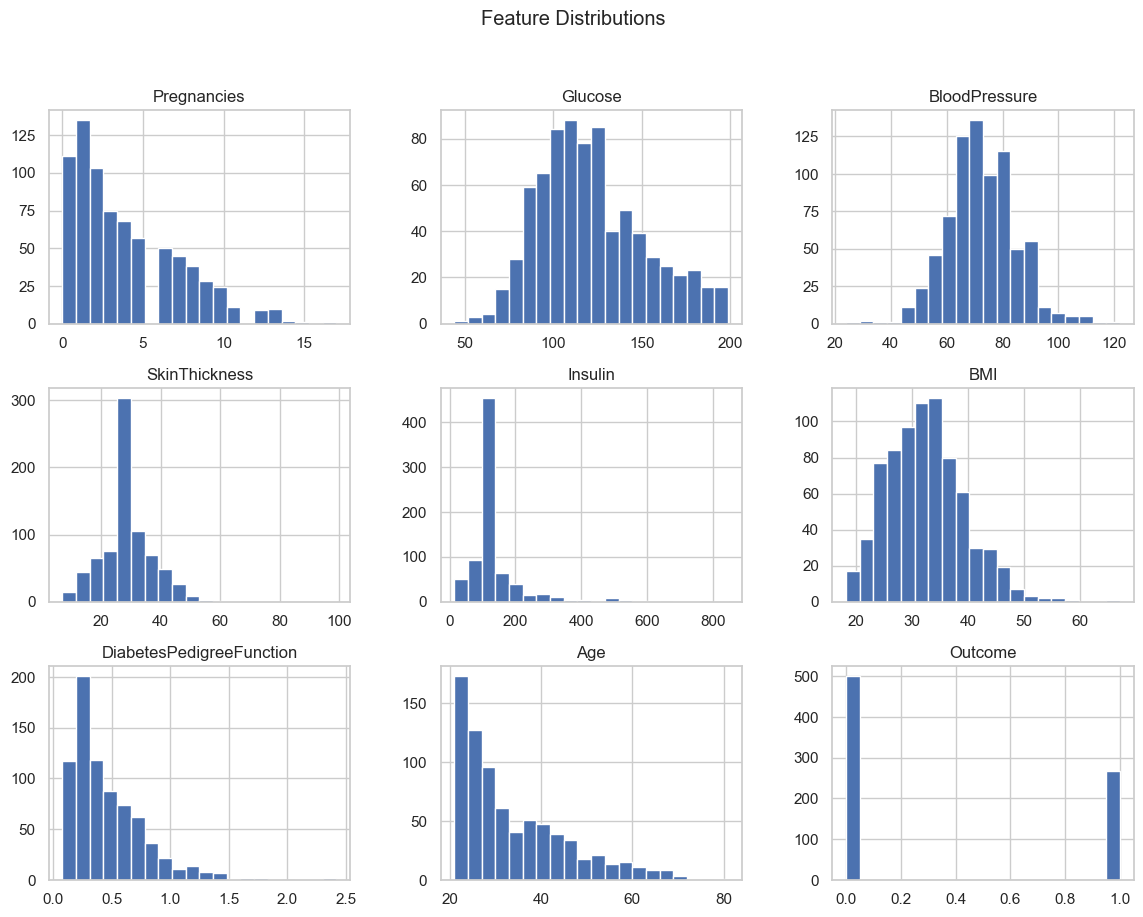

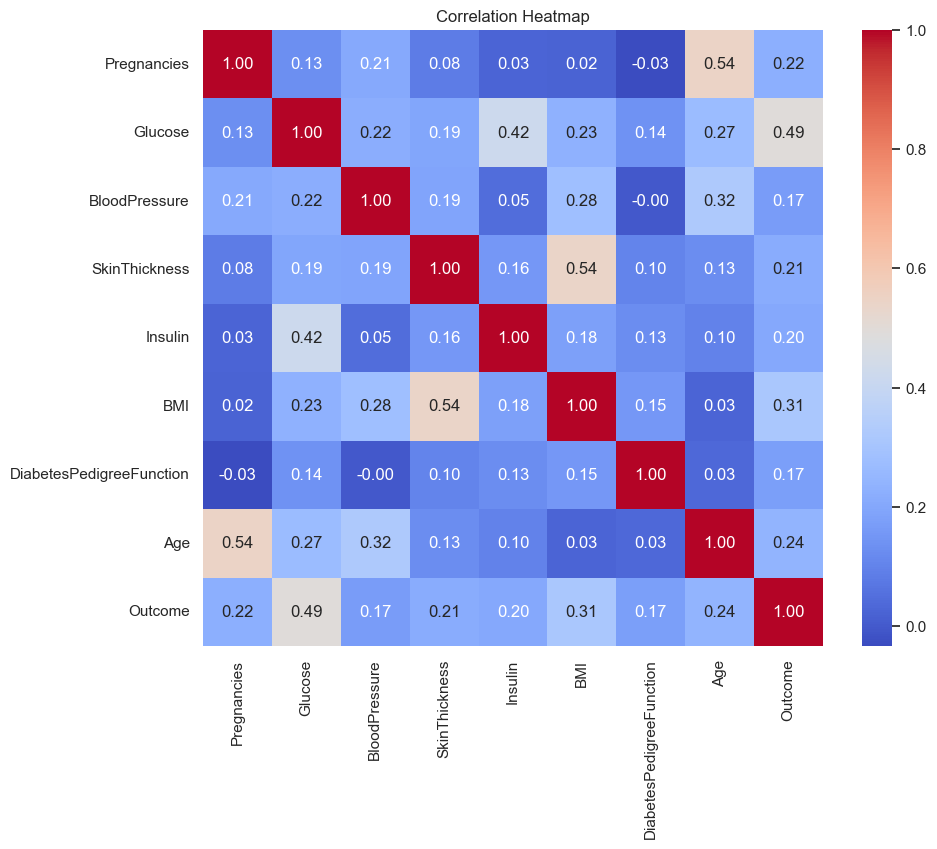

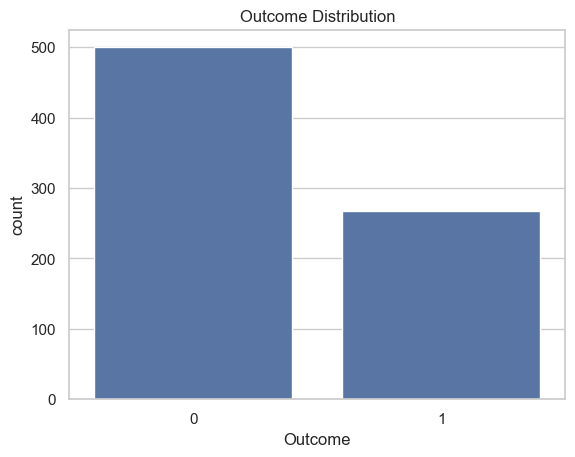

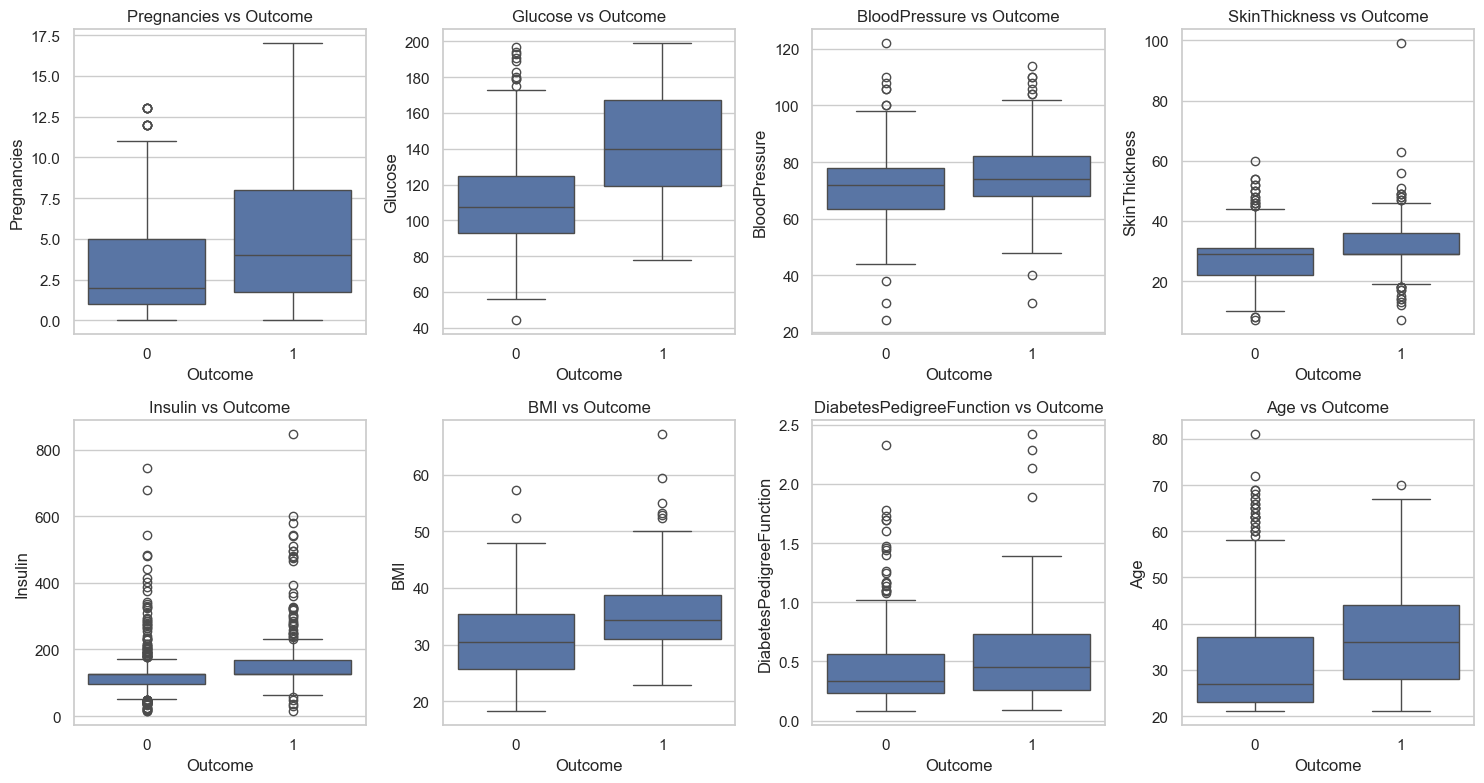


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154

Confusion Matrix:
[[69 30]
 [16 39]]
Accuracy: 0.7012987012987013


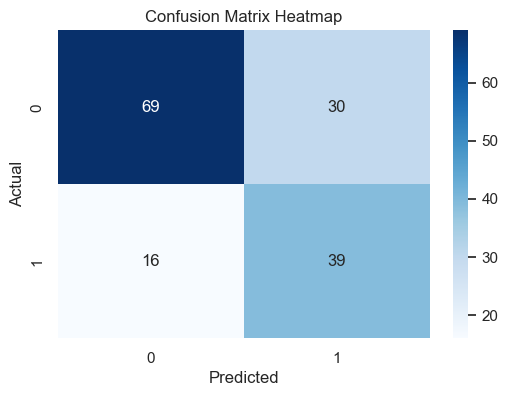

In [10]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('diabetes_python.csv')

# Basic info
print("\nDataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Check for missing or zero values
print("\nMissing or Zero Values:")
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(df[zero_columns].eq(0).sum())

# Replace 0s with NaN and impute later
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Impute missing values with median
df.fillna(df.median(), inplace=True)

# EDA Plots
sns.set(style="whitegrid")

# Histograms
df.hist(bins=20, figsize=(14,10))
plt.suptitle('Feature Distributions')
plt.show()



# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Outcome distribution
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distribution')
plt.show()

# Box plots
plt.figure(figsize=(15, 8))
for idx, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 4, idx)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()

# Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

# Logistic Regression Model
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
